# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg as LA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


### Загрузка датасета и общая информация

In [2]:
# открываем таблицу:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    try:
        df = pd.read_csv('\\Users\maxpe\Downloads\Practicum\Projects\project10\insurance.csv')
    except:
        df = pd.read_csv('insurance.csv')
display(df.shape);

(5000, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Датасет содержит 5000 строк и 5 столбцов. Пустых ячеек нет. Тип столбца `Пол` - целочисленный (выражен 0 и 1). Типы остальный данных - соответствует логике. 

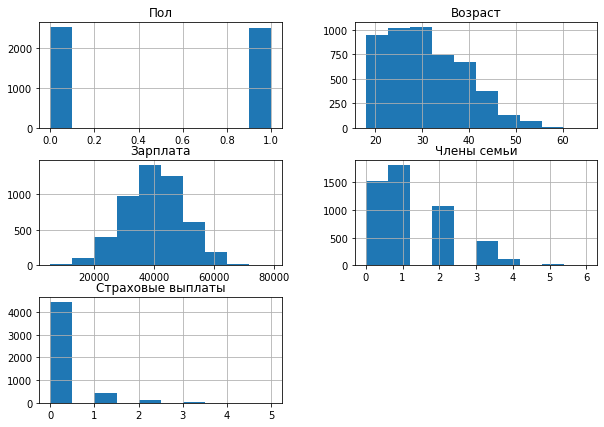

In [4]:
df.hist(figsize=(10,7));

Каких-либо выбросов не наблюдается.

In [5]:
duplicated_df = df[df.duplicated()]
display(duplicated_df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


Имеем 153 явных дубликата, которые могут и не являться дубликатами, т.к. признаков мало, большая часть из них - категориальная, а, например, зарплата - округлена. Оставляем без изменений.

Загрузка данных завершена. Данные не требуют предобработки.

### Описание данных

- `Признаки`: `Пол`, `Возраст`, `Зарплата` и `Члены семьи` застрахованного.
- `Целевой признак`: `Страховые выплаты` клиенту за последние 5 лет.

### Разбиение данных

In [6]:
df_features = df.drop(['Страховые выплаты'], axis=1)
df_target = df['Страховые выплаты']

In [7]:
df_features_train, df_features_valid, df_target_train, df_target_valid = train_test_split( #создаем 4 датасета, два признаков (тест+валидация) и два целевых, 
    df.drop(columns='Страховые выплаты'), #для датасетов признаков удаляем целевой
    df['Страховые выплаты'], #для целевого оставляем только целевой
    test_size=0.25, #с соотношением 75/25
    random_state=100) #с заданной опорой для рандома 

## Умножение матриц

Основные свойства матриц, необходимые для доказательства:

$$
AE = A
$$

$$
AA^{-1} = E
$$

где $A$ и $E$ - матрицы одного размера, квадратные;

Нужно учесть, что $XX^{-1}$ не равно $E$, т.к. матрица $X$ не квадратная.

$$
(AB)^T = B^TA^T
$$



$$
(AB)^{-1} = B^{-1}A^{-1}
$$

Обозначения для текущей задачи:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения - веса вектора $w$:

$$
w = (X^T X)^{-1} X^T y
$$

<b>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Ответ:</b> 

Не изменится

<b>Обоснование:</b>

Пусть существует матрица $X'$, для которой справедливо равенство:

$$X' = XP$$

где $P$ - обратимая матрица (в т.ч. квадратная). Обратимая матрица - это такая матрица, при умножении которой на ей обратную, получаем единичную матрицу:

$$PP^{-1} = E$$

Пусть предсказания для матрицы $X'$ вычисляются с такими значениями:

$$a' = X'w'$$

где $a'$ - предсказание по $X'$, $w'$ - вектор, на основе $X'$:

$$w' = ((X')^T X')^{-1} (X')^T y$$

Подставим значение вектора в значение предсказания $a'$:

$$a' = X' ((X')^T X')^{-1} (X')^T y$$

Раскроем $X'$:

$$a' = XP ((XP)^T XP)^{-1} (XP)^T y$$

отсюда, раскрыв $(X P)^T$, получим

$$a' = XP (P^T X^T X P)^{-1} P^T X^T y$$

Произведение матрицы $X$ на нее же транспонированную $X^T$ даст обратимую матрицу, обозначим ее $A$

$$a' = XP (P^T A P)^{-1} P^T X^T y$$

Матрицу $A$ можем умножить на матрицу $P$, либо матрицу $P^T$ умножить на $A$, матрицы имеют одинаковые размерности. Пойдем по второму пути. Обозначим эту матрицу $B$.

$$a' = XP (B P)^{-1} P^T X^T y$$


Теперь, когда внутри скобки лежат обратимые матрицы, можем воспользоваться свойством матриц и раскрыть скобки:

$$a' = XP P^{-1} B^{-1} P^T X^T y$$

Где $P P^{-1} = E$. Умножение матрицы на единичную ничего не изменяет, следовательно $E$ можем сократить. Отсюда, раскрывая скобки, получим:

$$a' = X B^{-1} P^T X^T y$$

Раскроем $B$:

$$a' = X A^{-1} (P^T)^{-1} P^T X^T y$$

Так как справедливо то, что $((P)^T)^{-1} P^T = E$, получим:

$$a' = X A^{-1} X^T y$$

Если отобразить матрицу $A$ через исходные до замены, получим:

$$a' = X(X^T X)^{-1} X^T y = a$$

Отсюда можем сделать вывод о том, что если умножить признаки на обратимую матрицу, это никак не повлияет на качество линейной регрессии. Так как в конечном счете, после всех преобразований, обратимая матрица, на которую мы домножили признаки, просто сокращается.

### Проверка коэффициентов для линейной регрессии

Согласно условию, в матрице признаков нулевой столбец состоит из единиц, вектор $y$ - это целевой признак, а $w$ - это вектор весов, в котором нулевой элемент - это сдвиг.

In [8]:
#создаем массив из тренировочных признаков, добавляем нулевым столбцом - единичный столбец. аналогично и для валидационного.
X = np.concatenate( #"склеиваем этим методом массивы"
    (np.ones((df_features_train.shape[0], 1)), #создается массив состоящий из 1, длиной в количество строк и с 1 столбцом
    df_features_train), #второй массив - признаков, 
    axis=1) #применяем построчно
y = df_target_train 
w = np.linalg.inv(X.T @ X) @ X.T @ y #формула для w, @ - умножение массивов, .Т - транспонирование
print("Смещение и вектор весов:", w)

Смещение и вектор весов: [-9.36500489e-01 -3.39317012e-03  3.58974211e-02 -2.44012518e-07
 -1.25896107e-02]


Полученный массив показывает смещение $w0$ (первое значение) и веса каждого признака для линейной регрессии.

Их можно сравнить с коэффициентами линейной регрессии из библиотеки `sklearn`:

In [9]:
lin_reg_train = LinearRegression()
lin_reg_train.fit(df_features_train, df_target_train) #обучаем на обучающей
print("Вектор весов:", lin_reg_train.coef_) #выводим коэффициенты для признаков

Вектор весов: [-3.39317012e-03  3.58974211e-02 -2.44012518e-07 -1.25896107e-02]


Коэффициенты совпадают. Смещение в этом случае не выводится в массив, т.к. `coef_` показывает только коэффициенты для веса признаков.

## Алгоритм преобразования

**Алгоритм**

Как было рассмотрено выше, умножение матрицы признаков на **любую** обратимую матрицу с размерностью, равной количеству признаков, не меняет значение предсказания и не искажает линейную регрессию.

- Создаем класс с функциями обучения и предсказания,
- Генерируем квадратную обратимую матрицу,
- Шифруем массив признаков умножением на сгенерированную матрицу,
- Обучаем модель и предсказываем целевой признак,
- Считаем необходимые метрики и сравниваем резельтаты.

**Обоснование**

Если предсказание

$$a=a'$$

$$Xw = X'w'$$

Тогда

$$X ((X)^T X)^{-1} (X)^T y = XP ((XP)^T XP)^{-1} (XP)^T y$$

Умножение на обратимую матрицу не искажает предсказания, т.к. после математических операций, сгенерированная матрица сокращается и не влияет на результат.

## Проверка алгоритма

### Создание класса

In [10]:
class LinearRegressionFunc: #создаем класс
    def fit(self, train_features, train_target): #создаем функцию с двумя аргументами (и self для класса)
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:] #значения вектора весов начинаются с первого w, присваиваем значение
        self.w0 = w[0] #смещение - нулевое значение w, присваиваем значение

    def predict(self, test_features): #функция предсказания, в аргументе - признаки
        return test_features.dot(self.w) + self.w0 #возвращаем матрица признаков*вектор весов + смещение

### Создание шифрующей матрицы

Матрица должна быть обратимой, а ее размерность должна быть равной количеству признаков.

Введем рандомную обратимую матрицу со стороной 4х4.

In [11]:
P = np.random.randint (0, 100, (4, 4))
P

array([[79, 34, 68, 39],
       [69, 18, 75, 19],
       [45, 88, 70, 69],
       [29, 81, 95, 16]])

Так как необратимых матриц крайне мало, можем создать обычную квадратную матрицу, и проверить существование для нее обратной. Запись выше каждый раз генерирует новую матрицу, запись ниже - обратную ей. Их произведение дает нам единичную матрицу.

In [12]:
P_inv = LA.inv(P)
P_inv

array([[ 0.07375234, -0.05649901, -0.02922318,  0.0133462 ],
       [ 0.06530352, -0.07039354, -0.02360832,  0.02622588],
       [-0.06761928,  0.06746838,  0.02210511, -0.010625  ],
       [-0.06278574,  0.05817827,  0.04123504, -0.03137256]])

In [13]:
np.dot(P, P_inv).round(5)

array([[ 1., -0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [ 0., -0., -0.,  1.]])

Получили единичную матрицу. В главной диаголали единицы, кроме них нули (-0 возникает из-за особенностей округления при работе с числами float). Если ошибки не возникает - матрица обратимая.

### Значение метрики $r2$ без шифрования

Найдем значение метрики $r2$ для данных, без изменений.

Для стандартной функции, с предсказанием на основе встроенных библиотек:

In [14]:
lin_orig = LinearRegression()
lin_orig.fit(df_features_train, df_target_train)
prediction_lin_orig = lin_orig.predict(df_features_valid) #предсказываем на валидационной
lin_orig_r2 = r2_score(df_target_valid, prediction_lin_orig) #считаем метрику r2
print("R2 =", lin_orig_r2)

R2 = 0.421836437073455


Для созданного класса и предсказаний в нем, согласно расчетов выше:

In [15]:
lin_func = LinearRegressionFunc()
lin_func.fit(df_features_train, df_target_train) #обучение
predictions_lin_func = lin_func.predict(df_features_valid) #предсказание с помощью функции класса на основе валидационных признаков
lin_func_r2 = r2_score(df_target_valid, predictions_lin_func)
print("R2 =", lin_func_r2) #метрика r2 на основе предиктов класса

R2 = 0.42183643707345175


Мы получили значение метрики $r2$ для данных без шифрования. 

Метрика $r2$ для обоих вариантов одинакова, с точностью до 14 знаков после запятой.

### MSE без шифрования

Сверим значения метрик MSE.

In [16]:
mse_orig = mean_squared_error(df_target_valid, prediction_lin_orig) #считаем метрику MSE
mse_func = mean_squared_error(df_target_valid, predictions_lin_func)

print('MSE_stand', mse_orig)
print('MSE_class', mse_func)

MSE_stand 0.12668312963698153
MSE_class 0.12668312963698225


Аналогичная ситуация для $MSE$. Стандартная LinearRegression() и класс LinearRegressionFunc(), предсказывают одинаково точно.

### Шифрование признаков

In [17]:
class LinearRegressionFunc_P:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]
        print("Смещение и вектор весов:", w)

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

df_features_train_P = df_features_train @ P #получаем зашифрованные матрицы: умножаем матрицы признаков на обратимую рандомную
df_features_valid_P = df_features_valid @ P

### Значение метрики $r2$ после шифрования признаков

In [18]:
lin_func_P = LinearRegressionFunc_P()
lin_func_P.fit(df_features_train_P, df_target_train)
predictions_lin_func_P = lin_func_P.predict(df_features_valid_P)
lin_func_P_r2 = r2_score(df_target_valid, predictions_lin_func_P)
mse_func_P = mean_squared_error(df_target_valid, predictions_lin_func_P)
print("R2 =", lin_func_P_r2)

print('MSE_class_P', mse_func_P)

Смещение и вектор весов: [-0.93651437 -0.00244633 -0.0030786   0.00278504  0.00269635]
R2 = 0.42183668399350527
MSE_class_P 0.12668307553359842


Если провести генерацию матрицы и дальнейший расчет несколько раз, можем увидеть, что смещение - нулевой элемент вектора $w$ не изменяется, в то время как все коэффициенты изменяются.

При этом, значение метрики $r2$, а также и $MSE$ не изменяется (есть изменение значения в пределах погрешности, связано с работой python с числами float).

### Матрицы: исходная, закодированная и декодированная

Посмотрим на содержание исходной матрицы

In [19]:
df_features_valid

,Пол,Возраст,Зарплата,Члены семьи
789,0,29.0,40200.0,0
2507,1,39.0,54200.0,0
2376,0,31.0,28300.0,1
1378,0,36.0,26400.0,0
598,1,26.0,42900.0,2
...,...,...,...,...
2987,1,23.0,49900.0,1
3016,1,22.0,40500.0,0
2167,1,39.0,23900.0,0
1079,0,21.0,21200.0,1


Это закодированные данные

In [20]:
df_features_valid_P

,0,1,2,3
789,1811001.0,3538122.0,2816175.0,2774351.0
2507,2441770.0,4770336.0,3796993.0,3740580.0
2376,1275668.0,2491039.0,1983420.0,1953305.0
1378,1190484.0,2323848.0,1850700.0,1822284.0
598,1932431.0,3775864.0,3005208.0,2960665.0
...,...,...,...,...
2987,2247195.0,4391729.0,3494888.0,3443592.0
3016,1824097.0,3564430.0,2836718.0,2794957.0
2167,1078270.0,2103936.0,1675993.0,1649880.0
1079,955478.0,1866059.0,1485670.0,1463215.0


Чтобы декодировать данные, нам нужен ключ - обратная матрица Р (либо сама матрица P, через которую мы получим обратную).

In [26]:
check = df_features_valid_P @ np.linalg.inv(P)
check.round(5)

,0,1,2,3
789,-0.0,29.0,40200.0,-0.0
2507,1.0,39.0,54200.0,0.0
2376,-0.0,31.0,28300.0,1.0
1378,-0.0,36.0,26400.0,-0.0
598,1.0,26.0,42900.0,2.0
...,...,...,...,...
2987,1.0,23.0,49900.0,1.0
3016,1.0,22.0,40500.0,-0.0
2167,1.0,39.0,23900.0,-0.0
1079,-0.0,21.0,21200.0,1.0


## Выводы

Соберем полученные значения в одну таблицу:

In [22]:
#собираем датасет из полученных данных
resuls_table = pd.DataFrame(index=['Линейная регрессия стандарт', 'Линейная регрессия класс', 'Линейная регрессия класс шифр'], \
    columns=['R2','MSE'])

resuls_table['R2'] = lin_orig_r2, lin_func_r2, lin_func_P_r2
resuls_table['MSE'] = mse_orig, mse_func, mse_func_P
resuls_table

,R2,MSE
Линейная регрессия стандарт,0.421836,0.126683
Линейная регрессия класс,0.421836,0.126683
Линейная регрессия класс шифр,0.421837,0.126683


В проекте было рассмотрено шифрование данных пользователей, без влияния этого шифрования на итоговое значение метрики R2.

Был дан ответ на вопрос: изменяется ли качество линейной регрессии после умножения признаков на обратимую матрицу. Ответ - нет. 

В работе приведены расчеты - обоснование такого ответа, а также выполнено шифрование таким методом, которое показало на практике, что такое взаимодействие матриц не сказывается на результатах обучения. 